In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import tensorflow as tf

In [4]:
observations = 1000

xs = np.random.uniform(-10,10,(observations,1))
zs = np.random.uniform(-10,10,(observations,1))

gen_inputs = np.column_stack((xs,zs))
print(gen_inputs.shape)
noise = np.random.uniform(-1,1,(observations,1))

gen_targets = 2*xs - 3*zs + 5 + noise
np.savez('TF_intro',inputs = gen_inputs,targets = gen_targets)

(1000, 2)


In [6]:
training_data = np.load('TF_intro.npz')
inpuut_size = 2
output_size = 1

model = tf.keras.Sequential([tf.keras.layers.Dense(output_size)])
model.compile(optimizer='sgd', loss= 'mean_squared_error')
model.fit(training_data['inputs'],training_data['targets'],epochs=150,verbose=1)

Epoch 1/150
32/32 [==============================] - 0s 497us/step - loss: 29.8088
Epoch 2/150
32/32 [==============================] - 0s 623us/step - loss: 4.3556
Epoch 3/150
32/32 [==============================] - 0s 993us/step - loss: 1.4256
Epoch 4/150
32/32 [==============================] - 0s 649us/step - loss: 0.6551
Epoch 5/150
32/32 [==============================] - 0s 841us/step - loss: 0.4398
Epoch 6/150
32/32 [==============================] - 0s 939us/step - loss: 0.3759
Epoch 7/150
32/32 [==============================] - 0s 1ms/step - loss: 0.3546
Epoch 8/150
32/32 [==============================] - 0s 693us/step - loss: 0.3554
Epoch 9/150
32/32 [==============================] - 0s 2ms/step - loss: 0.3484
Epoch 10/150
32/32 [==============================] - 0s 748us/step - loss: 0.3551
Epoch 11/150
32/32 [==============================] - 0s 779us/step - loss: 0.3478
Epoch 12/150
32/32 [==============================] - 0s 795us/step - loss: 0.3544
Epoch 13/150
32/

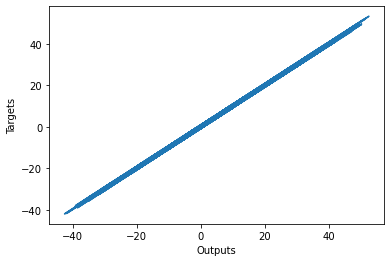

In [8]:
model.layers[0].get_weights()
plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])),np.squeeze(training_data['targets']))
plt.xlabel('Outputs')
plt.ylabel('Targets')
plt.show()